#  P9: ETUDE DE MARCHÉ AVEC PYTHON

### CHARGEMENT DE LIBRAIRIE

In [259]:
# Librairies de calcul:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import statsmodels
from functools import reduce    

# Libairies de representation graphique:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.graph_objects as go


# Pour le K-mean:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import nbmanips as nb
import warnings
warnings.filterwarnings('ignore')

# III/ SCALER LES DONNÉES ET DENDROGRAMME

### A/ Scaler les données

In [260]:
X = df5.values

In [261]:
X[:5]

array([[ 5.74000000e+00,  2.73643148e-01, -2.58000000e+00,
         5.08771930e+01,  4.91228070e+01],
       [ 3.14000000e+00,  1.28386251e-01, -1.20000000e-01,
         2.42681775e+01,  7.87063267e+01],
       [ 2.93000000e+00, -2.21446712e-02,  1.60000000e-01,
         8.08510638e+01,  2.76595745e+01],
       [ 3.53000000e+00,  1.73746392e-01, -1.14000000e+00,
         7.22021661e-01,  9.92779783e+01],
       [ 2.02000000e+00,  2.84238676e-02,  7.60000000e-01,
         4.84186314e+01,  8.70615296e+01]])

In [262]:
type(X)

numpy.ndarray

### taille de X

In [263]:
X.shape

(161, 5)

### noms des différents pays dans names

In [264]:
names = df5.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=161)

### noms des différentes colonnes dans feature

In [265]:
features = df5.columns
features

Index(['Croissance PIB(%)', 'croissance démographique (%)', 'Stabilité',
       'TDI (%)', 'TAS (%)'],
      dtype='object')

### on instantie les données

In [266]:
scaler = StandardScaler()


In [267]:
scaler.fit(X)

StandardScaler()

### on entraine le scaler

In [268]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 0.23587836,  1.41799583, -2.8516054 ,  0.16322675, -0.61914928],
       [-0.60674565,  0.10136291, -0.04966327, -0.4043923 , -0.00819792],
       [-0.67480374, -1.26307467,  0.26925697,  0.80262433, -1.06240253],
       [-0.48035205,  0.51251485, -1.21144415, -0.90667494,  0.41664263],
       [-0.96972215, -0.80471294,  0.95265749,  0.11078113,  0.16435162]])

### on vérifie que la moyenne est à 0 et l'écart type à 1

In [269]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4
mean,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0


### B/ Dendrogramme de classification ascendante hiérarchique (CAH)

In [270]:
Z = linkage(X_scaled, method="ward")
Z[:10]

array([[6.10000000e+01, 1.13000000e+02, 1.11536997e-01, 2.00000000e+00],
       [6.80000000e+01, 1.44000000e+02, 2.56802471e-01, 2.00000000e+00],
       [5.00000000e+01, 1.26000000e+02, 2.65992680e-01, 2.00000000e+00],
       [6.00000000e+00, 1.24000000e+02, 2.82402732e-01, 2.00000000e+00],
       [9.50000000e+01, 1.02000000e+02, 3.15878474e-01, 2.00000000e+00],
       [5.50000000e+01, 1.22000000e+02, 3.22717694e-01, 2.00000000e+00],
       [4.30000000e+01, 1.18000000e+02, 3.40180569e-01, 2.00000000e+00],
       [5.80000000e+01, 1.58000000e+02, 3.63688431e-01, 2.00000000e+00],
       [3.80000000e+01, 1.25000000e+02, 3.80819368e-01, 2.00000000e+00],
       [3.70000000e+01, 1.31000000e+02, 3.94276706e-01, 2.00000000e+00]])

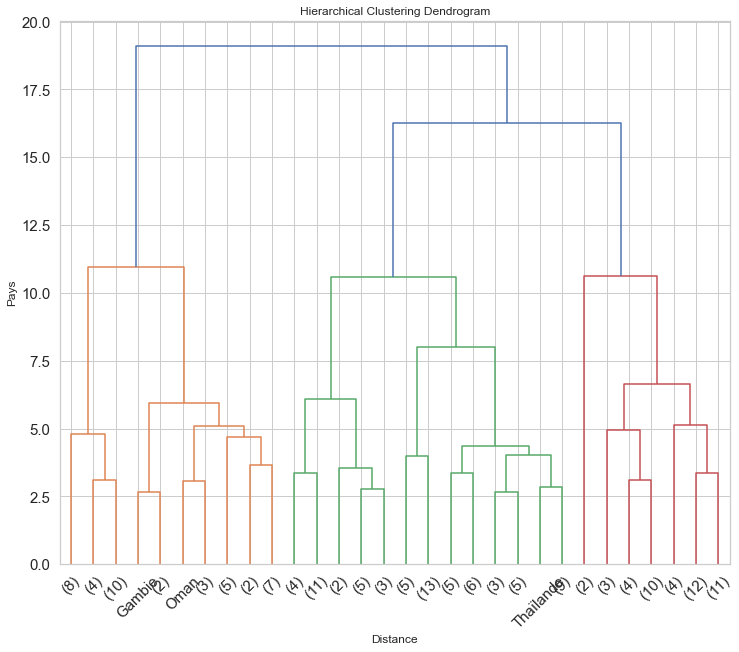

In [271]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))

_ = dendrogram(Z, labels= names, ax=ax,truncate_mode="lastp")

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Distance")
plt.ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
plt.show()

### Dendrogramme réduit à 6 clusters

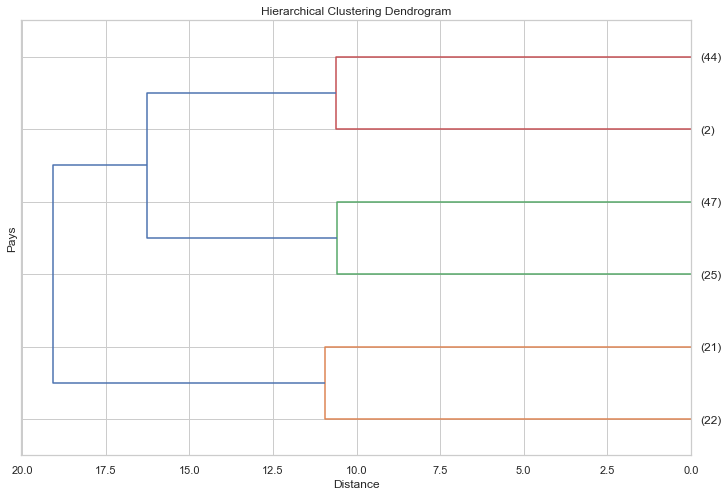

In [272]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, labels= names,p=6, truncate_mode="lastp", ax=ax, orientation='left')

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Distance")
plt.ylabel("Pays")
plt.show()

# IV/ MÉTHODE DU KMEANS

### A/ Méthode du coude

In [273]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

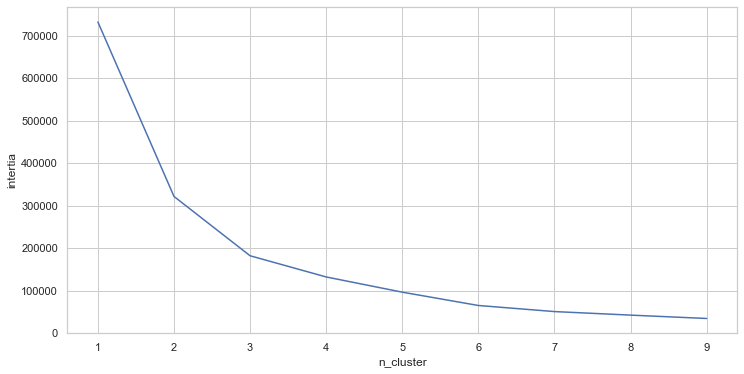

In [274]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)


### B/ Affichage des clusters et des centroïdes

In [275]:
k=6
k

6

In [276]:

clusters = fcluster(Z, k,criterion='maxclust')
clusters


array([2, 6, 1, 3, 6, 2, 1, 4, 4, 1, 4, 6, 6, 1, 4, 6, 5, 3, 4, 6, 4, 1,
       3, 6, 2, 1, 4, 3, 6, 4, 6, 3, 2, 4, 6, 1, 4, 6, 1, 6, 6, 4, 6, 4,
       6, 6, 6, 2, 2, 2, 1, 6, 4, 2, 2, 6, 1, 2, 4, 6, 4, 4, 3, 2, 4, 4,
       4, 6, 6, 6, 3, 4, 4, 2, 4, 2, 1, 1, 3, 2, 6, 1, 1, 3, 4, 3, 3, 4,
       6, 4, 2, 6, 2, 1, 3, 4, 1, 4, 3, 3, 6, 4, 4, 2, 3, 6, 3, 4, 4, 5,
       4, 6, 6, 4, 6, 6, 3, 3, 4, 4, 4, 4, 6, 3, 1, 1, 1, 1, 2, 6, 4, 6,
       6, 4, 6, 6, 6, 3, 2, 3, 6, 4, 2, 4, 6, 6, 4, 3, 6, 4, 1, 6, 4, 3,
       3, 4, 3, 1, 4, 4, 2], dtype=int32)

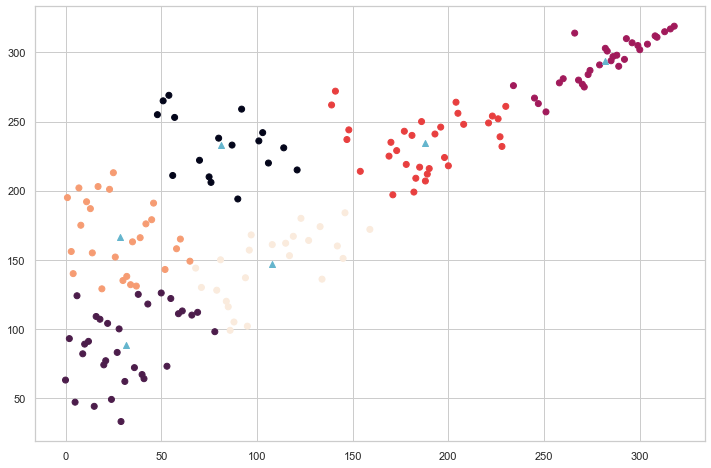

In [277]:

fig = plt.figure(figsize=(12,8))
model = KMeans(n_clusters=6)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.show()


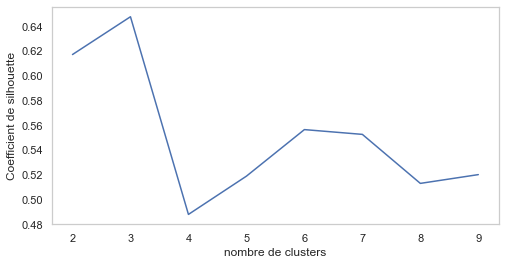

In [278]:
from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X)
    tab_silhouette.append(silhouette_score(X,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()

### C/ Analyse des groupes

### indexation des groupes de clusters

In [279]:
#Identification des 6 groupes obtenus
gpe = fcluster(Z, 6, criterion='maxclust')
#index triés des groupes
idg = np.argsort(gpe)
#Affichage des pays selon leurs groupes
df = pd.DataFrame(df5.index[idg], gpe[idg]).reset_index()
df_index = df.rename(columns={'index':'Groupe'})
df_index.head()

,Groupe,Zone
0,1,Macédoine du Nord
1,1,Cuba
2,1,Grenade
3,1,Géorgie
4,1,Cabo Verde


In [280]:
df_total = pd.merge(df_index,df5,on='Zone')
df_total.set_index('Zone', inplace=True)
df_total.head()

,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Macédoine du Nord,1,3.69,0.005899,-0.32,97.560976,4.878049
Cuba,1,5.46,0.010004,0.50,91.228070,8.479532
Grenade,1,4.75,0.049147,0.71,87.500000,12.500000
Géorgie,1,5.46,-0.023458,-0.49,83.606557,36.065574
Cabo Verde,1,1.88,0.103750,0.76,120.000000,10.000000


### D/ Distribution des valeurs des groupes

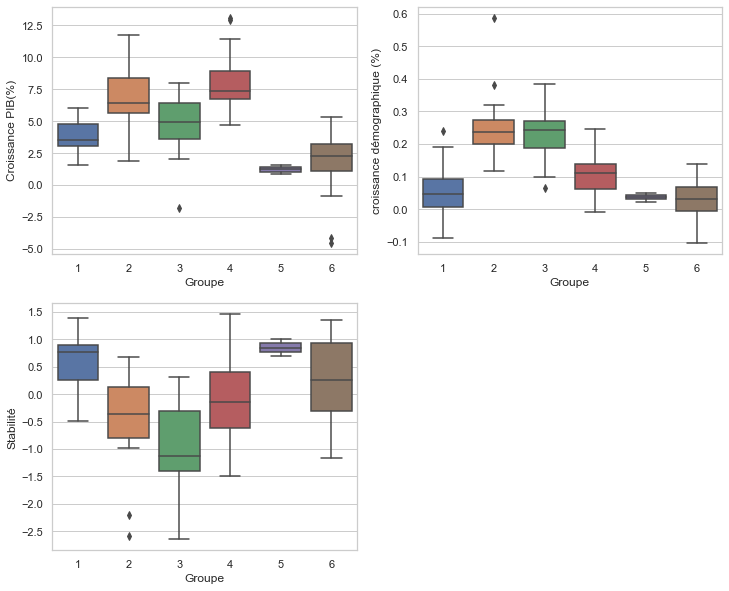

In [281]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_total, x='Groupe', y='Croissance PIB(%)')
plt.subplot(222)
sns.boxplot(data=df_total, x='Groupe', y='croissance démographique (%)')
plt.subplot(223)
sns.boxplot(data=df_total, x='Groupe', y='Stabilité')

plt.show()

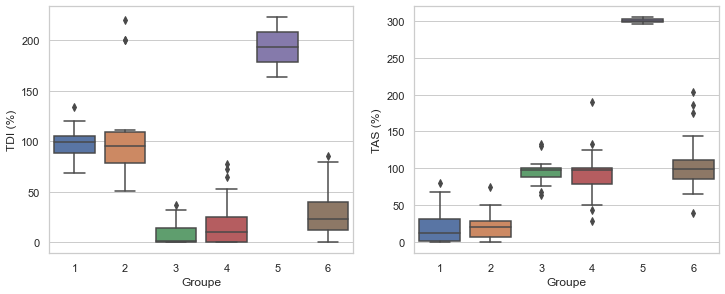

In [282]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_total, x='Groupe', y='TDI (%)')
plt.subplot(222)
sns.boxplot(data=df_total, x='Groupe', y='TAS (%)')
plt.show()

## Les 6 clusters

### 1er groupe

In [283]:
c1=df_total.loc[df_total['Groupe']==1]
print(c1.shape)
c1.head(7)

(22, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Macédoine du Nord,1,3.69,0.005899,-0.32,97.560976,4.878049
Cuba,1,5.46,0.010004,0.50,91.228070,8.479532
Grenade,1,4.75,0.049147,0.71,87.500000,12.500000
Géorgie,1,5.46,-0.023458,-0.49,83.606557,36.065574
Cabo Verde,1,1.88,0.103750,0.76,120.000000,10.000000
Lesotho,1,4.74,0.056498,0.02,88.235294,11.764706
Lettonie,1,3.39,-0.089861,0.46,104.878049,80.487805


### 2ème groupe

In [284]:
c2=df_total.loc[df_total['Groupe']==2]
print(c2.shape)
c2.head(20)

(21, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Gambie,2,1.88,0.271525,-0.08,200.000000,25.000000
Ghana,2,8.45,0.201274,0.02,71.563981,28.436019
Guinée,2,6.77,0.218022,-0.99,74.000000,26.000000
Guinée-Bissau,2,6.39,0.230989,-0.69,100.000000,75.000000
Haïti,2,3.93,0.117984,-0.75,90.816327,9.183673
Iraq,2,7.87,0.292234,-2.21,83.038869,16.961131
Timor-Leste,2,9.38,0.159531,-0.19,220.000000,20.000000
Koweït,2,4.40,0.382845,0.12,72.486772,29.629630
Tadjikistan,2,5.72,0.209029,-0.92,95.000000,5.000000


### 3ème groupe

In [285]:
c3=df_total.loc[df_total['Groupe']==3]
print(c3.shape)
c3.head()

(25, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Pakistan,3,6.72,0.182827,-2.53,0.156006,99.921997
Nigéria,3,5.09,0.235777,-2.04,0.000000,99.504950
Cameroun,3,4.77,0.239662,-0.90,0.000000,98.780488
Turquie,3,2.39,0.138442,-1.34,0.179211,130.943847
Niger,3,6.84,0.363143,-1.17,14.285714,90.476190


### 4ème groupe

In [286]:
c4=df_total.loc[df_total['Groupe']==4]
print(c4.shape)
c4.head(7)

(47, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Myanmar,4,9.04,0.061412,-1.10,0.180072,99.759904
Nicaragua,4,5.23,0.110135,-0.29,4.347826,103.623188
Thaïlande,4,6.95,0.033238,-1.06,0.227015,190.238365
Bolivie (État plurinational de),4,9.99,0.129824,-0.34,0.233100,124.242424
Malaisie,4,7.03,0.117697,0.14,4.194941,106.354102
Népal,4,9.77,0.040073,-1.03,0.000000,100.000000
Bangladesh,4,11.46,0.093520,-1.27,0.000000,99.600000


### 5ème groupe

In [287]:
c5=df_total.loc[df_total['Groupe']==5]
print(c5.shape)
c5.head()

(2, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Pays-Bas,5,0.84,0.022577,1.00,163.440860,295.698925
Belgique,5,1.59,0.049680,0.69,222.368421,304.605263


### 6ème groupe

In [288]:
c6=df_total.loc[df_total['Groupe']==6]
print(c6.shape)
c6.head()

(44, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Venezuela (République bolivarienne du),6,-4.18,0.015724,-1.10,3.993610,95.846645
Suriname,6,0.99,0.088558,0.14,72.000000,40.000000
Suède,6,3.05,0.061923,1.06,44.919786,83.957219
Allemagne,6,2.02,0.028424,0.76,48.418631,87.061530
Ukraine,6,2.70,-0.033760,-1.17,11.992071,120.019822


## CALCUL DES MOYENNES DE CHAQUE INDICATEUR PAR GROUPE

In [289]:
df_total.groupby('Groupe').mean()

,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Groupe,,,,,
1,3.780455,0.052732,0.572727,96.734994,19.992260
2,6.837619,0.251335,-0.434286,105.611867,21.472095
3,4.776800,0.235186,-1.004400,7.882513,94.753271
4,7.891064,0.109501,-0.096596,17.603860,91.995795
5,1.215000,0.036128,0.845000,192.904641,300.152094
6,1.987955,0.030300,0.276818,27.341293,103.453343


# on travaille sur le cluster 2 qui semble le plus interessant pour notre analyse car il a le TDI moyen le plus élevé et le TAS moyen le plus bas avec en plus un bon taux de croissance du PIB et un taux de croissance démographique suffisant

### E/ Analyse du cluster 2

In [290]:
 c2 = c2[['Croissance PIB(%)', 'croissance démographique (%)',
       'Stabilité', 'TDI (%)', 'TAS (%)']]

In [291]:
X1 = c2.values

In [292]:
X1[:5]

array([[ 1.88000000e+00,  2.71525254e-01, -8.00000000e-02,
         2.00000000e+02,  2.50000000e+01],
       [ 8.45000000e+00,  2.01273595e-01,  2.00000000e-02,
         7.15639810e+01,  2.84360190e+01],
       [ 6.77000000e+00,  2.18021843e-01, -9.90000000e-01,
         7.40000000e+01,  2.60000000e+01],
       [ 6.39000000e+00,  2.30989249e-01, -6.90000000e-01,
         1.00000000e+02,  7.50000000e+01],
       [ 3.93000000e+00,  1.17983517e-01, -7.50000000e-01,
         9.08163265e+01,  9.18367347e+00]])

In [293]:
type(X1)

numpy.ndarray

### taille de X

In [294]:
X1.shape

(21, 5)

### noms des différents pays dans names

In [295]:
names1 = c2.index
names1

Index(['Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Iraq',
       'Timor-Leste', 'Koweït', 'Tadjikistan', 'Libéria',
       'Sao Tomé-et-Principe', 'Gabon', 'Mauritanie', 'Mongolie', 'Oman',
       'Kirghizistan', 'Afghanistan', 'Îles Salomon', 'Angola', 'Bénin',
       'Congo'],
      dtype='object', name='Zone')

### noms des différentes colonnes dans feature

In [296]:
features1 = c2.columns
features1

Index(['Croissance PIB(%)', 'croissance démographique (%)', 'Stabilité',
       'TDI (%)', 'TAS (%)'],
      dtype='object')

### on instantie les données

In [297]:
scaler1 = StandardScaler()


In [298]:
scaler1.fit(X1)

StandardScaler()

### on entraine le scaler

In [299]:
X1_scaled = scaler.transform(X1)
X1_scaled[:5]

array([[-1.01509421,  1.39879889, -0.00410323,  3.34428942, -1.11732739],
       [ 1.11415185,  0.76202604,  0.10979685,  0.60451384, -1.04636759],
       [ 0.5696871 ,  0.91383498, -1.04059402,  0.65647858, -1.09667564],
       [ 0.44653436,  1.03137373, -0.69889376,  1.21110622, -0.08474004],
       [-0.35071759,  0.00707078, -0.76723381,  1.01520164, -1.44396216]])

### on vérifie que la moyenne est à 0 et l'écart type à 1

In [300]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4
mean,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0


In [301]:
Z1 = linkage(X1_scaled, method="ward")
Z1[:10]

array([[ 2.        , 15.        ,  0.56453743,  2.        ],
       [ 1.        , 19.        ,  0.58041942,  2.        ],
       [ 8.        , 20.        ,  0.58269373,  2.        ],
       [11.        , 18.        ,  0.69938724,  2.        ],
       [12.        , 23.        ,  0.74695949,  3.        ],
       [ 9.        , 10.        ,  1.0978688 ,  2.        ],
       [ 7.        , 24.        ,  1.09932648,  3.        ],
       [21.        , 25.        ,  1.22546201,  5.        ],
       [ 6.        , 17.        ,  1.22834985,  2.        ],
       [ 5.        , 16.        ,  1.26268062,  2.        ]])

In [302]:
# Une liste vide pour enregistrer les inerties :  
intertia_list1 = [ ]

# Notre liste de nombres de clusters : 
k_list1 = range(1, 10)

# Pour chaque nombre de clusters : 
for k1 in k_list1 : 
    
    # On instancie un k-means pour k clusters
    kmeans1 = KMeans(n_clusters=k1)
    
    # On entraine
    kmeans1.fit(X1)
    
    # On enregistre l'inertie obtenue : 
    intertia_list1.append(kmeans1.inertia_)

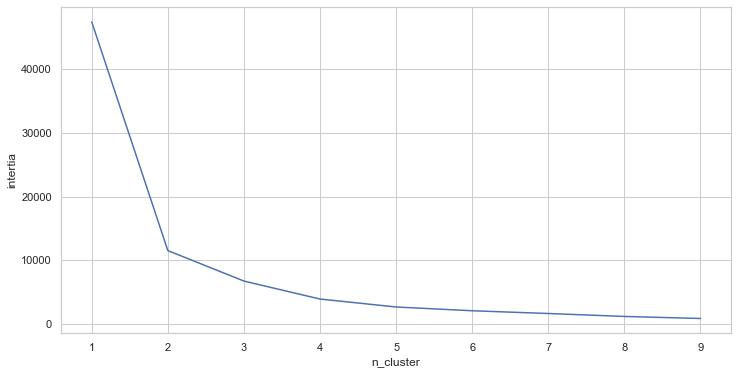

In [303]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list1, intertia_list1)


### Affichage des clusters et des centroïdes

In [304]:
k1=4
k1

4

In [305]:

clusters1 = fcluster(Z1, k1,criterion='maxclust')
clusters1


array([1, 3, 4, 4, 4, 4, 1, 2, 4, 3, 3, 2, 4, 3, 2, 4, 4, 1, 2, 3, 4],
      dtype=int32)

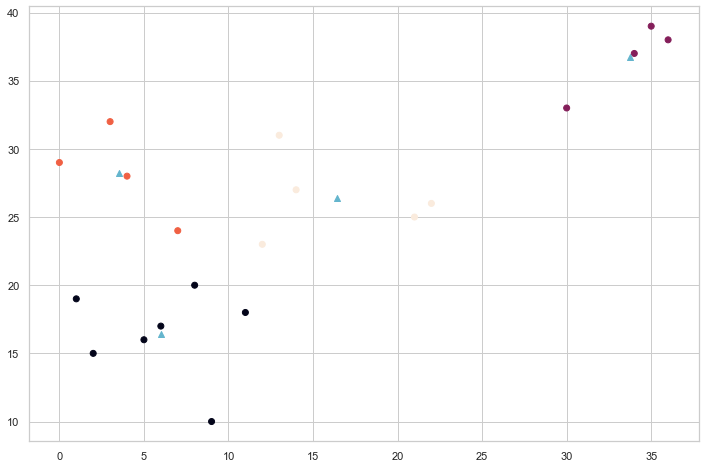

In [306]:

fig = plt.figure(figsize=(12,8))
model1 = KMeans(n_clusters=4)
model1.fit(Z1)
model1.predict(Z1)
plt.scatter(Z1[:,0], Z1[:,1],c=model1.predict(Z1))
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], marker='^',c='c')
plt.show()


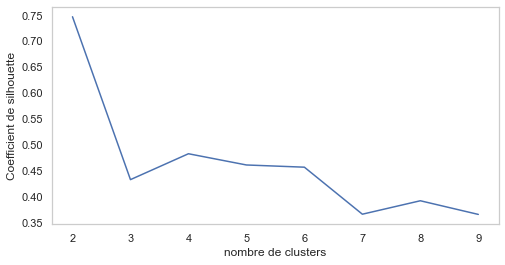

In [307]:
from sklearn.metrics import silhouette_score
tab_silhouette1 =[]
k_range1=range(2,10)
for k1 in k_range1:
    model1=KMeans(n_clusters=k1)
    cluster_labels1=model1.fit_predict(X1)
    tab_silhouette1.append(silhouette_score(X1,cluster_labels1))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range1,tab_silhouette1)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()

In [308]:
#Identification des 6 groupes obtenus
gpe1 = fcluster(Z1, 4, criterion='maxclust')
#index triés des groupes
idg1 = np.argsort(gpe1)
#Affichage des pays selon leurs groupes
df1 = pd.DataFrame(c2.index[idg1], gpe1[idg1]).reset_index()
df1_index = df1.rename(columns={'index':'Groupe'})
df1_index.head()

,Groupe,Zone
0,1,Gambie
1,1,Îles Salomon
2,1,Timor-Leste
3,2,Angola
4,2,Oman


In [309]:
df_sous_groupe = pd.merge(df1_index,c2,on='Zone')
df_sous_groupe.set_index('Zone', inplace=True)
df_sous_groupe.shape

(21, 6)

### 1er sous groupe

In [310]:
sg1=df_sous_groupe.loc[df_sous_groupe['Groupe']==1]
print(sg1.shape)
sg1.head(8)

(3, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Gambie,1,1.88,0.271525,-0.08,200.0,25.0
Îles Salomon,1,7.81,0.236797,0.37,200.0,0.0
Timor-Leste,1,9.38,0.159531,-0.19,220.0,20.0


### Calcul de la moyenne par pays 

In [311]:
popu1=round(popu.groupby('Zone').mean(),2)


### Affichage de la population moyenne par pays du sous groupe1

In [312]:
popu_sg1 = popu1.loc[['Gambie', 'Îles Salomon','Timor-Leste']]
popu_sg1['Population']

Zone
Gambie          1762956.68
Îles Salomon     522872.26
Timor-Leste     1073634.58
Name: Population, dtype: float64

### 2ème sous groupe

In [313]:
sg2=df_sous_groupe.loc[df_sous_groupe['Groupe']==2]
print(sg2.shape)
sg2.head(14)

(4, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Angola,2,5.67,0.319124,-0.36,86.833856,13.166144
Oman,2,6.26,0.587893,0.62,110.526316,6.140351
Gabon,2,4.66,0.304860,0.11,97.435897,5.128205
Koweït,2,4.40,0.382845,0.12,72.486772,29.629630


### Affichage de la population moyenne par pays du sous groupe 2

In [314]:
popu_sg2 = popu1.loc[['Angola','Oman','Gabon','Koweït']]
popu_sg2['Population']

Zone
Angola    22917624.68
Oman       3206863.00
Gabon      1617271.32
Koweït     2946550.21
Name: Population, dtype: float64

### 3ème sous groupe

In [315]:
sg3=df_sous_groupe.loc[df_sous_groupe['Groupe']==3]
print(sg3.shape)
sg3.head()

(5, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Mongolie,3,11.76,0.165565,0.68,111.111111,0.000000
Bénin,3,8.38,0.248475,0.13,76.397516,11.180124
Sao Tomé-et-Principe,3,9.52,0.169966,0.17,100.000000,50.000000
Ghana,3,8.45,0.201274,0.02,71.563981,28.436019
Libéria,3,10.47,0.238379,-0.48,96.000000,30.000000


### Affichage de la population moyenne  par pays pour le sous groupe 3

In [316]:
popu_sg3 = popu1.loc[['Mongolie','Bénin','Sao Tomé-et-Principe','Ghana','Libéria']]
popu_sg3['Population']

Zone
Mongolie                 2720309.63
Bénin                    9031221.68
Sao Tomé-et-Principe      175418.63
Ghana                   24284884.79
Libéria                  3770714.00
Name: Population, dtype: float64

### 4ème sous groupe

In [317]:
sg4=df_sous_groupe.loc[df_sous_groupe['Groupe']==4]
print(sg4.shape)
sg4.head(9)

(9, 6)


,Groupe,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,,
Tadjikistan,4,5.72,0.209029,-0.92,95.000000,5.000000
Iraq,4,7.87,0.292234,-2.21,83.038869,16.961131
Mauritanie,4,5.48,0.260180,-0.85,109.090909,22.727273
Haïti,4,3.93,0.117984,-0.75,90.816327,9.183673
Guinée-Bissau,4,6.39,0.230989,-0.69,100.000000,75.000000
Kirghizistan,4,6.98,0.162613,-0.80,78.125000,21.875000
Afghanistan,4,5.74,0.273643,-2.58,50.877193,49.122807
Guinée,4,6.77,0.218022,-0.99,74.000000,26.000000
Congo,4,6.07,0.227115,-0.44,94.545455,6.363636


### Affichage de la population moyenne par pays pour le sous groupe 4

In [318]:
popu_sg4 = popu1.loc[['Tadjikistan','Iraq','Mauritanie','Haïti','Guinée-Bissau','Kirghizistan','Afghanistan','Guinée','Congo']]
popu_sg4['Population']

Zone
Tadjikistan       7475051.11
Iraq             30122744.58
Mauritanie        3440993.79
Haïti             9797120.79
Guinée-Bissau     1505153.42
Kirghizistan      5450853.47
Afghanistan      28845766.58
Guinée           10080103.00
Congo             4142352.11
Name: Population, dtype: float64

## CALCUL DES MOYENNES DES INDICATEURS PAR SOUS GROUPE

In [319]:
df_sous_groupe.groupby('Groupe').mean()

,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Groupe,,,,,
1,6.356667,0.222618,0.033333,206.666667,15.000000
2,5.247500,0.398681,0.122500,91.820710,13.516082
3,9.716000,0.204732,0.104000,91.014522,23.923229
4,6.105556,0.221312,-1.136667,86.165972,25.803724


# Distribution des valeurs des sous groupes

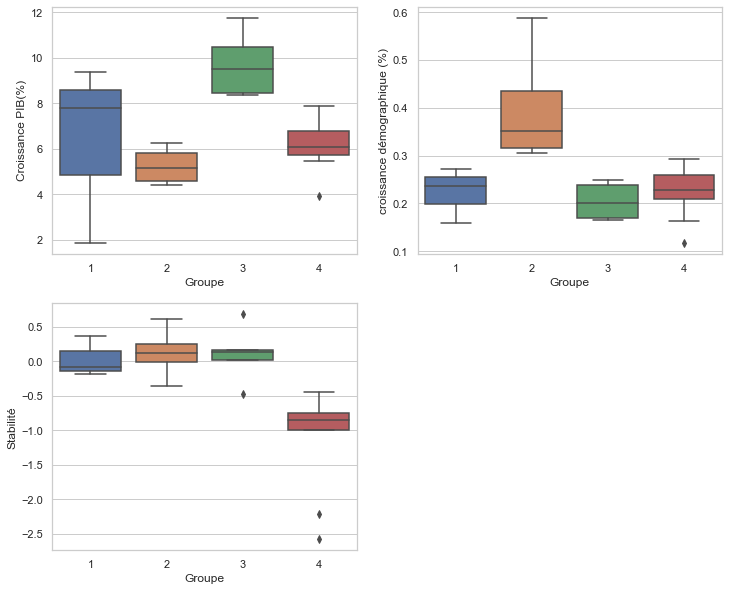

In [320]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_sous_groupe, x='Groupe', y='Croissance PIB(%)')
plt.subplot(222)
sns.boxplot(data=df_sous_groupe, x='Groupe', y='croissance démographique (%)')
plt.subplot(223)
sns.boxplot(data=df_sous_groupe, x='Groupe', y='Stabilité')
plt.show()

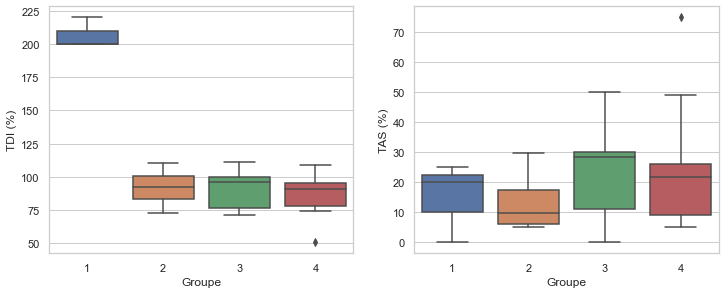

In [321]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_sous_groupe, x='Groupe', y='TDI (%)')
plt.subplot(222)
sns.boxplot(data=df_sous_groupe, x='Groupe', y='TAS (%)')
plt.show()

# Au vue de la distribution des valeurs pour chaque sous groupe et de la clusterisation en sous groupe , les sous groupe 1 et 3 sont les plus favorables

# V/ METHODE D'ANALYSE DES COMPOSANTES PRINCIPALES (ACP) SUR LE CLUSTER 2 SÉLECTIONNÉS

# Nous allons observer déjà les 3 premières composantes :


In [322]:
n_components = 3

pca = PCA(n_components=n_components)

In [323]:
#On l'entraine sur les données scalées :
pca.fit(X1_scaled)

PCA(n_components=3)

### variance des composantes

In [324]:
pca.explained_variance_ratio_

array([0.38458486, 0.28429293, 0.19618809])

In [325]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([38.46, 28.43, 19.62])

### variance cumulée en pourcentage

In [326]:
scree_cum = scree.cumsum().round()
scree_cum

array([38., 67., 87.])

## les 3 premières composantes représentent 87% des valeurs ce qui semble suffisant

### Définir  une variable avec la liste de nos composantes 

In [327]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

### A/ Graphique des éboulis des valeurs propres

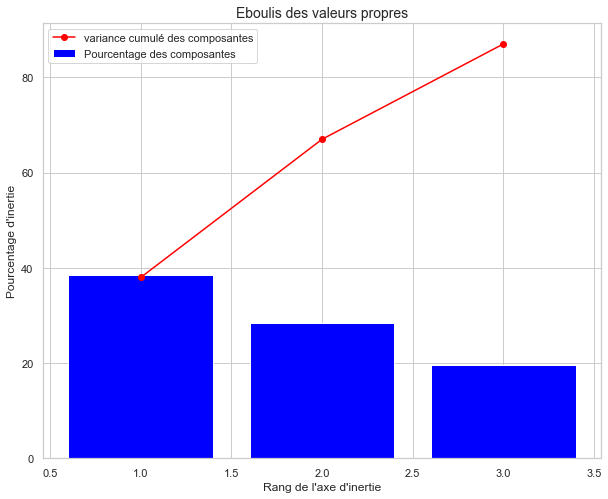

In [328]:
plt.figure(figsize=(10,8))
plt.bar(x_list, scree,label= 'Pourcentage des composantes', color = 'blue')
plt.plot(x_list, scree_cum,label = 'variance cumulé des composantes',c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",size = 14)
plt.legend()
plt.show()

### calcul des composantes par la variable pcs

In [329]:
pcs = pca.components_
pcs

array([[-0.13102093, -0.03430341, -0.69460131, -0.69542681,  0.12476923],
       [-0.40797609,  0.87848581,  0.18338494, -0.15920224, -0.05331793],
       [-0.62842891, -0.08001506, -0.479396  ,  0.60658409,  0.03016465]])

### affichage en dataframe

In [330]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4
0,-0.131021,-0.034303,-0.694601,-0.695427,0.124769
1,-0.407976,0.878486,0.183385,-0.159202,-0.053318
2,-0.628429,-0.080015,-0.479396,0.606584,0.030165


In [331]:
pcs.columns = features1
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
F1,-0.13,-0.03,-0.69,-0.70,0.12
F2,-0.41,0.88,0.18,-0.16,-0.05
F3,-0.63,-0.08,-0.48,0.61,0.03


In [332]:
pcs.T

,F1,F2,F3
Croissance PIB(%),-0.131021,-0.407976,-0.628429
croissance démographique (%),-0.034303,0.878486,-0.080015
Stabilité,-0.694601,0.183385,-0.479396
TDI (%),-0.695427,-0.159202,0.606584
TAS (%),0.124769,-0.053318,0.030165


### B/ Matrice des corrélation entre les composantes et les indicateurs étudiés

<AxesSubplot:>

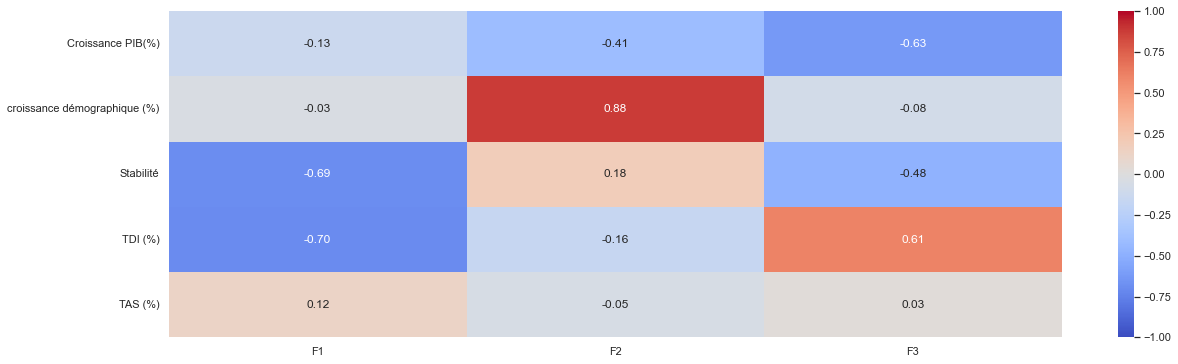

In [333]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### C/ CERCLE DES CORRÉLATIONS

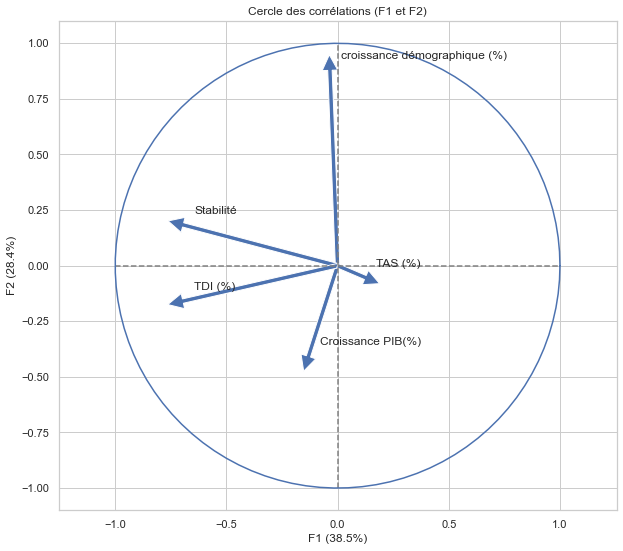

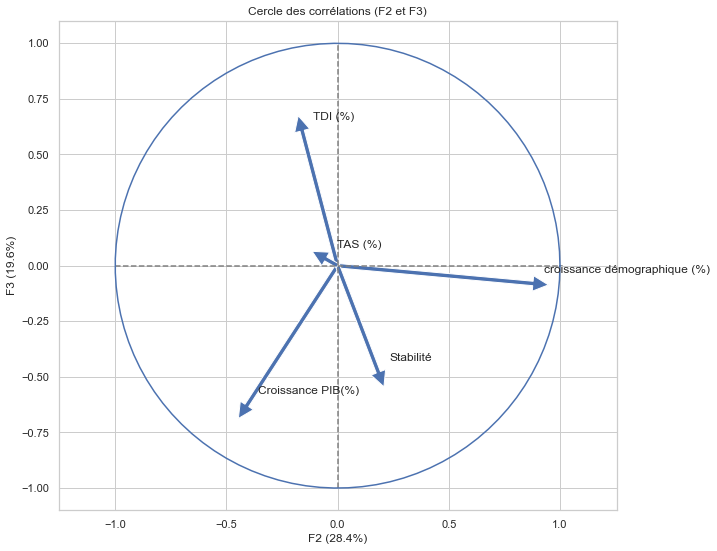

In [334]:
def correlation_graph(pca, 
                      x_y, 
                      features1) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features1[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
#Essayons cette fonction pour F1 et F2

#-- ATTENTION -- Encore une fois Pour F1 et F2 il faut bien préciser 0 et 1 😀


x_y = (0,1)
x_y

correlation_graph(pca, x_y, features1)
#Essayons pour F3 et F4 :


correlation_graph(pca, (1,2), features1)

### D/ PROJECTION SUR LE PLAN VECTORIEL

In [335]:
X_projected = pca.transform(X1_scaled)
X_projected[:5]

array([[-1.46719249,  0.56582793,  2.02513712],
       [ 0.11072703, -0.40896691, -0.9763583 ],
       [ 0.93350418, -0.27003126, -0.06485166],
       [ 0.44881784, -0.19612136,  0.20627945],
       [ 0.6025289 , -0.67957042,  0.66218418]])

### A/ Définition de la fonction

In [336]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels1 = None,
                                clusters1=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels1 is None : 
        labels1 = []
    try : 
        len(labels1)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters1 is None else clusters1
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                    c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c,palette='deep')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels1) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels1[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


### A-1/ Projection pour F1 et F2

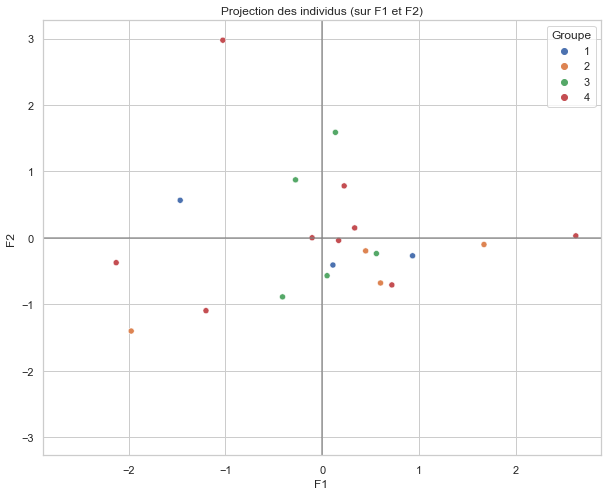

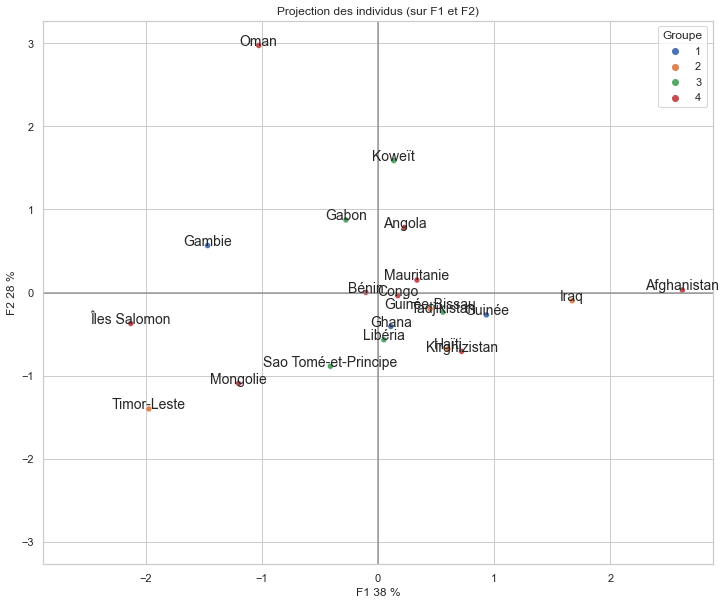

In [337]:
x_y = [0,1]

display_factorial_planes(X_projected, x_y, clusters1=df_sous_groupe['Groupe'])


display_factorial_planes(X_projected, x_y, pca,labels1=names1,figsize=(12,10),clusters1= df_sous_groupe['Groupe'])
plt.show()

### A-2/ Projection pour F2 et F3

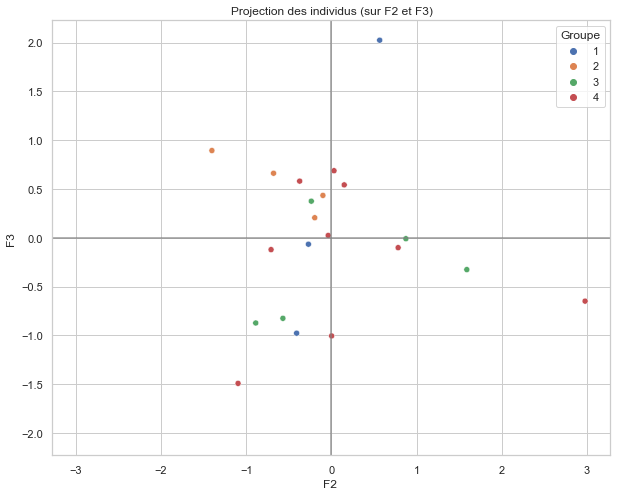

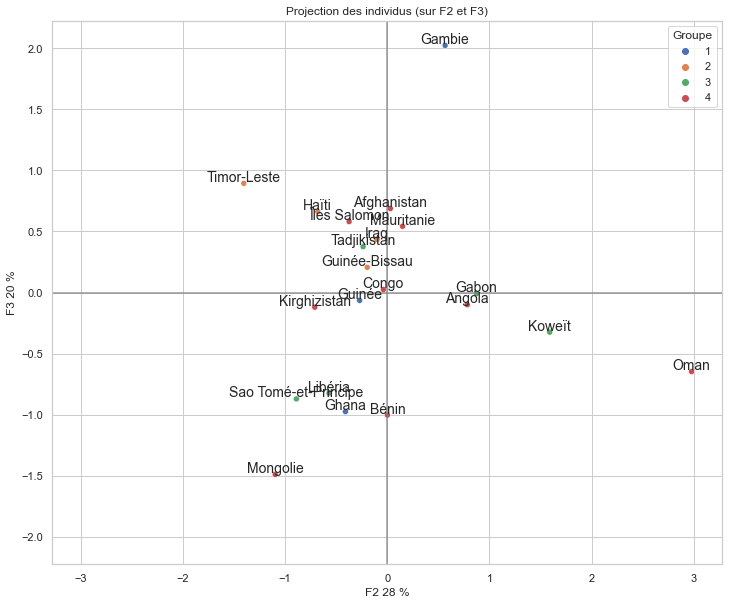

In [338]:
x_y = [1,2]

display_factorial_planes(X_projected, x_y, clusters1=df_sous_groupe['Groupe'])

display_factorial_planes(X_projected, x_y, pca, labels1=names1, figsize=(12,10), clusters1=df_sous_groupe['Groupe'],marker="o")

### B/ Comparaison du PCA et de la projection sur le plan vectoriel

### B-1/ Comparaison pour F1 et F2

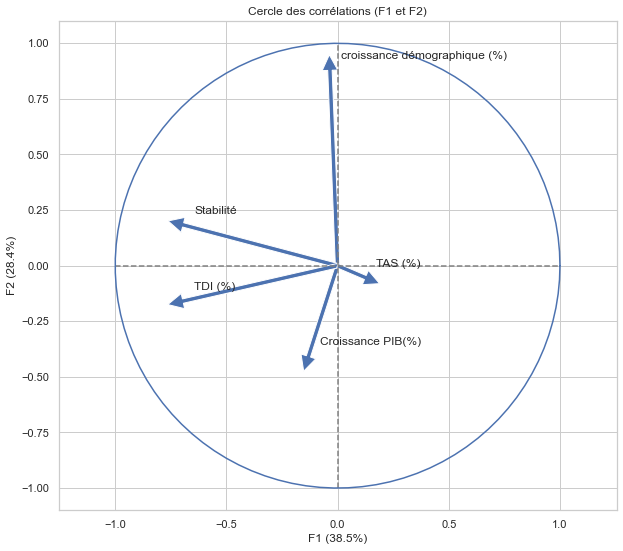

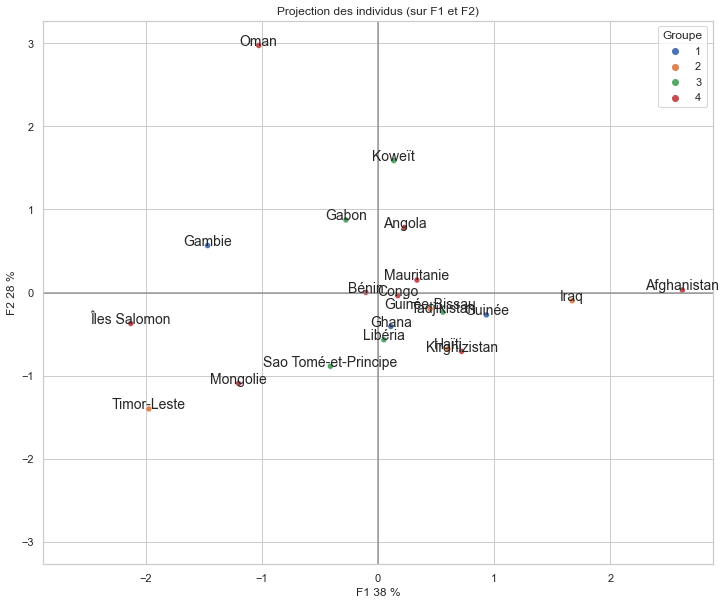

In [339]:
x_y = (0,1)

correlation_graph(pca, x_y, features1)

display_factorial_planes(X_projected, x_y, pca,labels1=names1,figsize=(12,10),clusters1= df_sous_groupe['Groupe'])
plt.show()

## Observation: On peut remarquer que les pays corrélés au TDI sont bien ceux que nous avons identifié et qui font partie des sous groupe 1 et 3

### B-2/ Comparaison pour F2 et F3

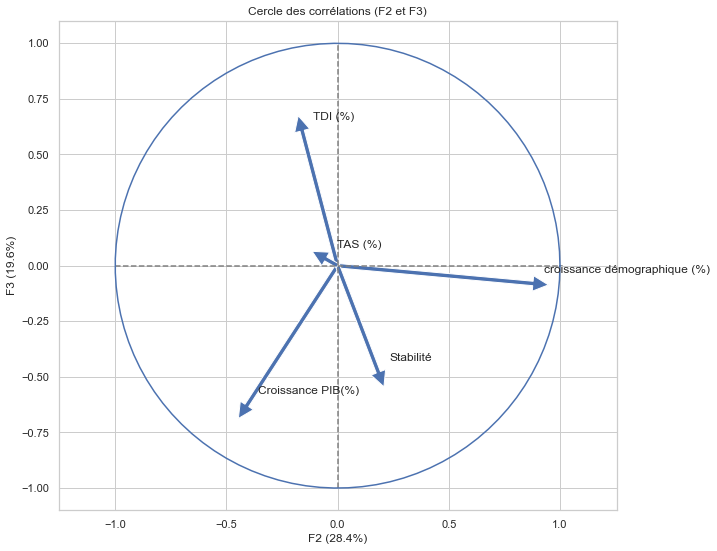

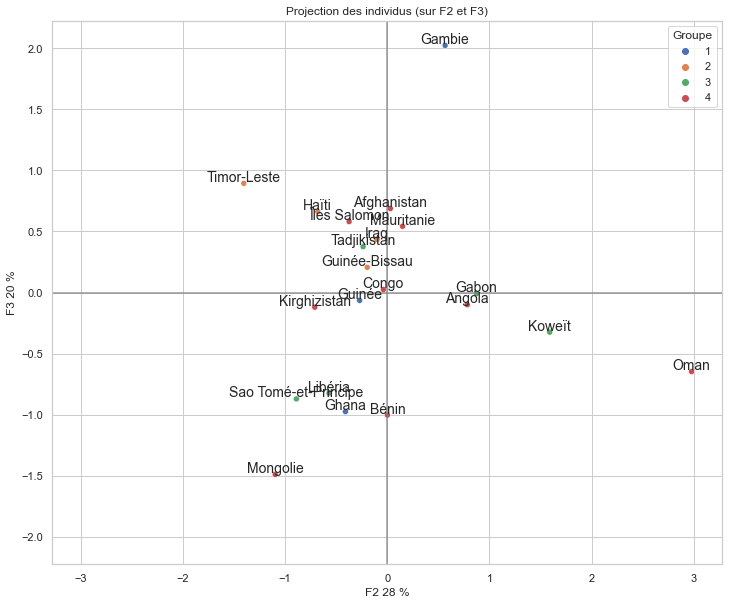

In [340]:
x_y = (1,2)


correlation_graph(pca, x_y, features1)

display_factorial_planes(X_projected, x_y, pca,labels1=names1,figsize=(12,10),clusters1= df_sous_groupe['Groupe'])
plt.show()